In [0]:
# Install tensorflow-2.1.0
!pip install -q tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 44kB/s 
     |████████████████████████████████| 450kB 35.0MB/s 


In [0]:
# Import packages
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization,MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [0]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Shape of training data:", X_train.shape, y_train.shape)
print("Shape of test data:", X_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
Shape of training data: (60000, 28, 28) (60000,)
Shape of test data: (10000, 28, 28) (10000,)


In [0]:
# Some variables
batch_size = 128
num_of_classes = 10
epochs = 50

In [0]:
# Normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))
y_train = tf.keras.utils.to_categorical(y_train, num_of_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_of_classes)
input_shape = (28, 28, 1)
print("Data processing done...")

Data processing done...


In [0]:
# Build model
i = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(num_of_classes, activation='softmax')(x)

model = Model(i, x)
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928 

In [0]:
# Train model with Data augmentation
steps_per_epoch = X_train.shape[0] // batch_size
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, zca_whitening=True ,rotation_range=45)
model_history = model.fit(data_generator.flow(X_train, y_train, batch_size=batch_size), validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=100)

  ...
    to  
  ['...']
Train for 468 steps, validate on 10000 samples
Epoch 1/100


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator spec

468/468 [==============================] - 21s 45ms/step - loss: 0.7060 - accuracy: 0.7696 - val_loss: 0.4780 - val_accuracy: 0.8681
Epoch 2/100
468/468 [==============================] - 15s 32ms/step - loss: 0.2352 - accuracy: 0.9292 - val_loss: 0.1140 - val_accuracy: 0.9669
Epoch 3/100
468/468 [==============================] - 14s 31ms/step - loss: 0.1726 - accuracy: 0.9486 - val_loss: 0.0840 - val_accuracy: 0.9753
Epoch 4/100
468/468 [==============================] - 14s 31ms/step - loss: 0.1426 - accuracy: 0.9583 - val_loss: 0.2013 - val_accuracy: 0.9378
Epoch 5/100
468/468 [==============================] - 14s 31ms/step - loss: 0.1310 - accuracy: 0.9614 - val_loss: 0.1333 - val_accuracy: 0.9558
Epoch 6/100
468/468 [==============================] - 14s 30ms/step - loss: 0.1127 - accuracy: 0.9674 - val_loss: 0.0694 - val_accuracy: 0.9789
Epoch 7/100
468/468 [==============================] - 14s 31ms/step - loss: 0.1087 - accuracy: 0.9683 - val_loss: 0.0653 - val_accuracy: 0.98

In [0]:
# Evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.022275074268919615
Test accuracy: 0.9928


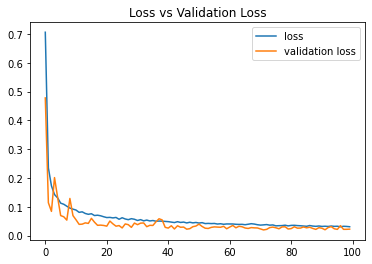

In [0]:
# Plot Loss vs Validation loss
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Loss vs Validation Loss')
plt.show()

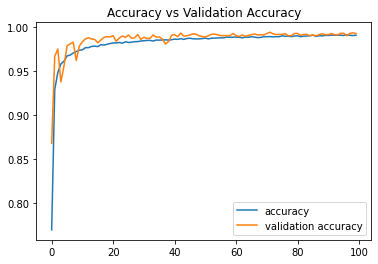

In [0]:
# Plot Accuracy vs Validation accuracy
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Accuracy vs Validation Accuracy')
plt.show()

In [0]:
# Save model
model.save('mnist_cnn_data_augmented.h5')